In [2]:
import pandas as pd
column_names = [
    'CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B', 'LSTAT', 'MEDV'
]
df = pd.read_csv('housing.csv',delim_whitespace=True, names=column_names)

print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


/tmp/ipython-input-643775581.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('housing.csv',delim_whitespace=True, names=column_names)


In [3]:
print("Shape of dataset:", df.shape)

Shape of dataset: (506, 14)


In [4]:
print("Feature names:", df.columns.tolist())

Feature names: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [5]:
target_column =  'MEDV'
print(df[target_column].describe())

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64


In [6]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


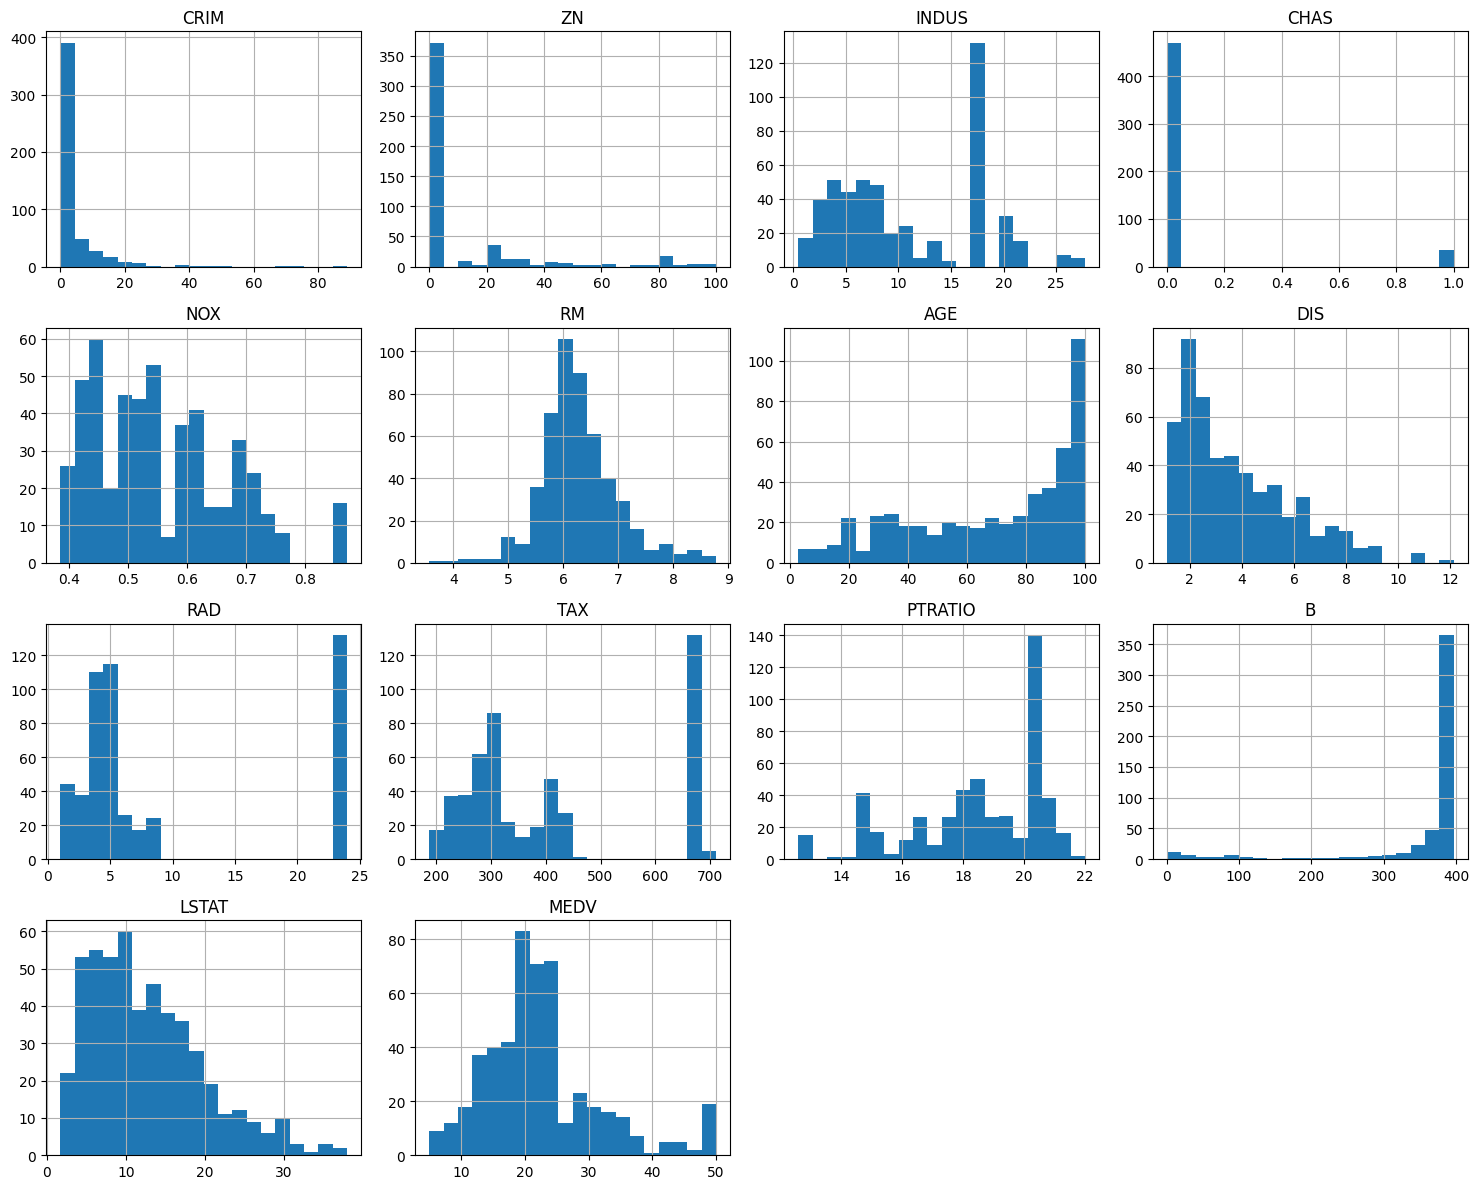

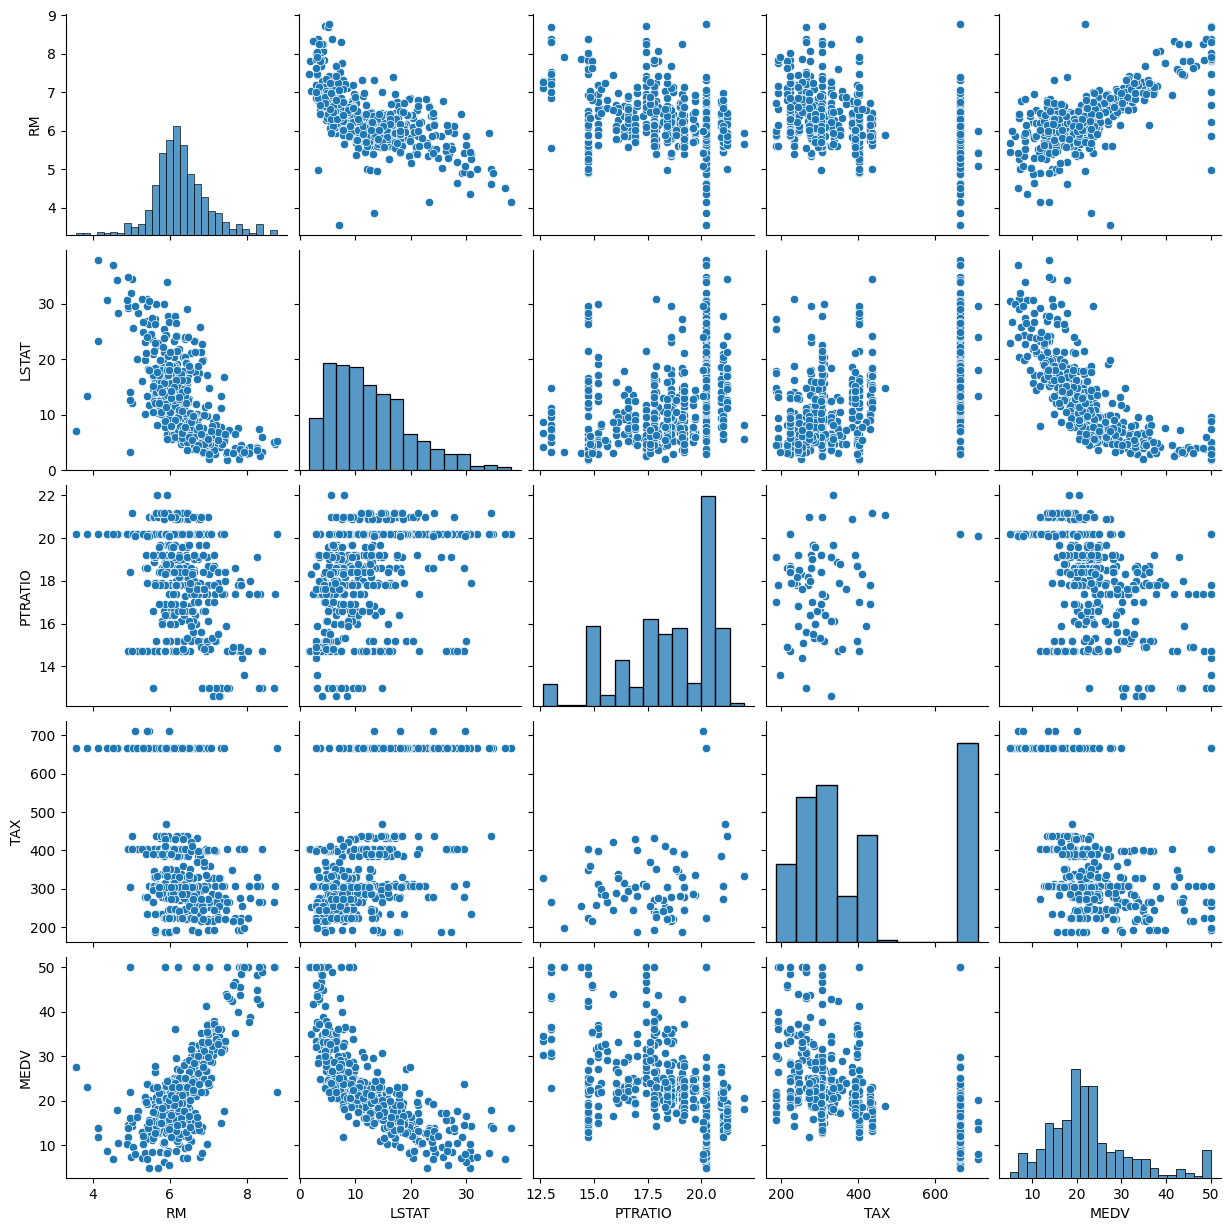

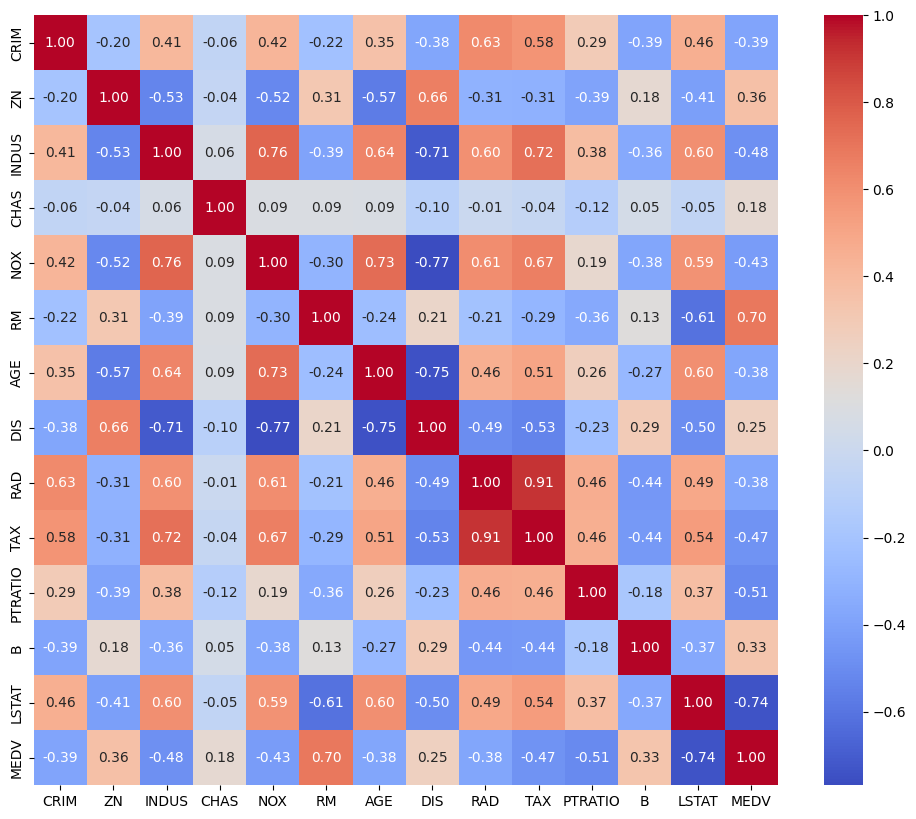

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(bins=20, figsize=(15, 12))
plt.tight_layout()
plt.show()

sns.pairplot(df[['RM', 'LSTAT', 'PTRATIO', 'TAX', 'MEDV']])
plt.show()

corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Linear Regression

Mean Absolute Error 4.478335832064149
Mean Squared Error 46.144775347317264
R2 Score -0.2101195275849439


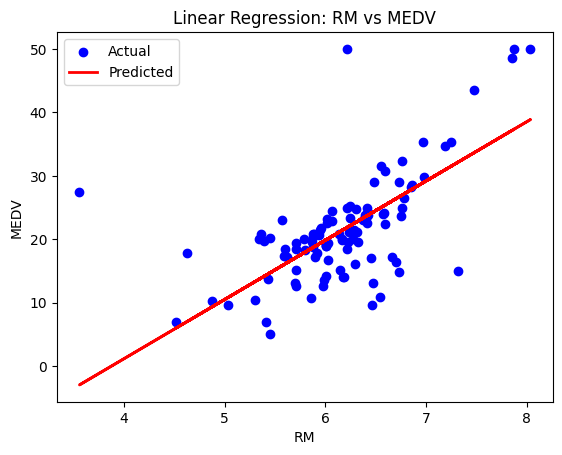

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

X = df[['RM']]
y = df['MEDV']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("Mean Absolute Error",mean_absolute_error(y_pred,y_test))
print("Mean Squared Error", mean_squared_error(y_pred,y_test))
print("R2 Score",r2_score(y_pred,y_test))

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Linear Regression: RM vs MEDV')
plt.legend()
plt.show()

In [9]:
from math import sqrt

X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(mae,mse,rmse,r2)

3.189091965887837 24.291119474973478 4.928602182665332 0.6687594935356326


In [10]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coefficients.sort_values(by='Coefficient', ascending=False))

    Feature  Coefficient
5        RM     4.438835
3      CHAS     2.784438
8       RAD     0.262430
2     INDUS     0.040381
1        ZN     0.030110
11        B     0.012351
6       AGE    -0.006296
9       TAX    -0.010647
0      CRIM    -0.113056
12    LSTAT    -0.508571
10  PTRATIO    -0.915456
7       DIS    -1.447865
4       NOX   -17.202633


In [11]:
student_data = [
    {'Marks': 45, 'Hours_Studied': 2, 'Attendance': 60, 'Result': 'Fail'},
    {'Marks': 75, 'Hours_Studied': 5, 'Attendance': 80, 'Result': 'Pass'},
    {'Marks': 60, 'Hours_Studied': 4, 'Attendance': 70, 'Result': 'Pass'},
    {'Marks': 30, 'Hours_Studied': 1, 'Attendance': 50, 'Result': 'Fail'},
    {'Marks': 90, 'Hours_Studied': 6, 'Attendance': 90, 'Result': 'Pass'},
    {'Marks': 55, 'Hours_Studied': 3, 'Attendance': 65, 'Result': 'Pass'},
    {'Marks': 25, 'Hours_Studied': 1, 'Attendance': 40, 'Result': 'Fail'},
    {'Marks': 85, 'Hours_Studied': 5, 'Attendance': 95, 'Result': 'Pass'},
    {'Marks': 40, 'Hours_Studied': 2, 'Attendance': 55, 'Result': 'Fail'},
    {'Marks': 70, 'Hours_Studied': 4, 'Attendance': 85, 'Result': 'Pass'},
]


